# 11: Neural networks and deep learning

The hand-in exercise for this topic is Exercise 2 from the notebook “Exercises in neural network and deep learning II.ipynb”

### Assemble + Installs + Imports

In [19]:
# Lib imports for the notebook
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
# read the csv
adult_data = pd.read_csv("adult.csv")

### Initial EDA

In [21]:
adult_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [22]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


---

### Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable 'income'.

### Data Prep

To do this i will need to preprocess the data

In [23]:
# First of all lets check for missing values
adult_data.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [24]:
# Since there are some missing categorical values, we are going to fill them in with the most common category of its column
categorical_columns = adult_data.select_dtypes(include=['object']).columns
adult_data[categorical_columns] = adult_data[categorical_columns].fillna(adult_data[categorical_columns].mode().iloc[0])
# Check result
adult_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

---

### Encode the 'income' feature

I encode the 'income' feature so its understandable for MLM and Neural Networks. These models require a numerical input and might fail with the original >50k and <=50k

In [25]:
# Init labe encoder and apply it to income
label_encoder = LabelEncoder()
adult_data['income'] = label_encoder.fit_transform(adult_data['income'])

### Specify Feature and Target variables

Im going to sepperate numeric and categorical here, as they should be prepped differently...

In [26]:
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = [col for col in categorical_columns if col != 'income']

In [27]:
# Transform them in each their way
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

Initialize a train test split and pre process the data

In [28]:
X = adult_data.drop(columns=['income'])
y = adult_data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Build a neural network using keras library

In [30]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\danie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3349 - loss: -19.9550 - val_accuracy: 0.3523 - val_loss: -326.4210
Epoch 2/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.3618 - loss: -762.7825 - val_accuracy: 0.3454 - val_loss: -2709.4573
Epoch 3/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.3617 - loss: -4044.1123 - val_accuracy: 0.3500 - val_loss: -8572.7900
Epoch 4/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.3631 - loss: -11245.9258 - val_accuracy: 0.3456 - val_loss: -18742.7129
Epoch 5/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.3621 - loss: -23440.9434 - val_accuracy: 0.3486 - val_loss: -33634.8359
Epoch 6/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.3621 - loss: -40543.5078 - val_accuracy: 0.3502 - val_loss: -53988.6094
Epoch 7/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.3637 - loss: -65662.3047 - val_accuracy: 0.3495 - val_loss: -79701.8594
Epoch 8/50
489/489 ━━━━━━━━━━━━━

### Evaluation of the neural network model:

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ' + str((test_acc * 100)) + '%')

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.3641 - loss: -10762964.0000
Test Accuracy: 36.073294281959534%


### Validation loss

* As seen in the epochs the validation of the model falls off over time
* This can also be clearly visualized using a plot

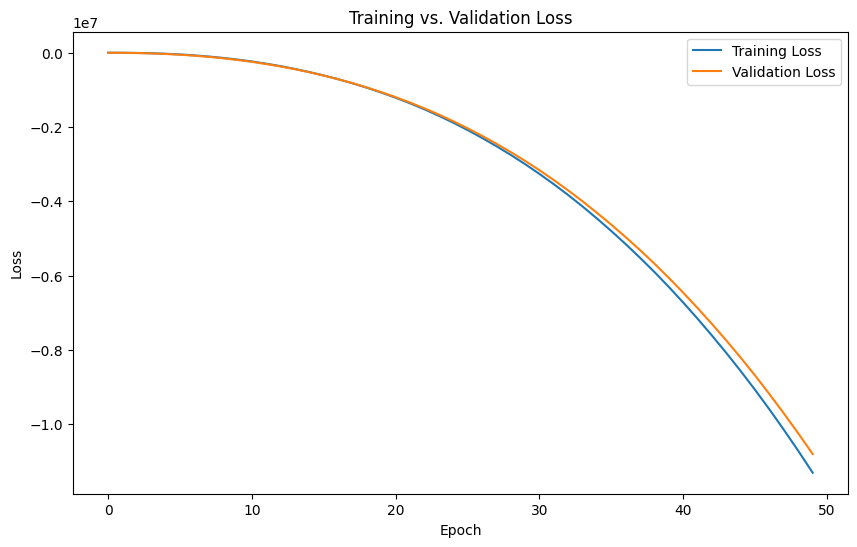

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.show()